In [137]:
# preamble to be able to run notebooks in Jupyter and Colab
try:
    from google.colab import drive
    import sys
    
    drive.mount('/content/drive')
    notes_home = "/content/drive/My Drive/CSC310/notes/"
    user_home = "/content/drive/My Drive/"
    sys.path.insert(1,notes_home) # let the notebook access the notes folder

except ModuleNotFoundError:
    notes_home = "" # running native Jupyter environment -- notes home is the same as the notebook
    user_home = ""  # under Jupyter we assume the user directory is the same as the notebook

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [138]:
import pandas as pd
url ="https://raw.githubusercontent.com/IndraniMandal/CSC310-S20/master/messy_covid19_southamerica%20-%20covid19_southamerica.csv"
df = pd.read_csv(url)
df

,ObservationDate,Country_Region,Province_State,Confirmed,Deaths,Recovered,Active
0,2020-01-23,Mexico,NaN,0.0,0,0,0.0
1,2020-01-23,Brazil,NaN,0.0,0,0,0.0
2,2020-01-23,Colombia,NaN,0.0,0,0,0.0
3,2020-02-26,Brazil,NaN,1.0,0,0,1.0
4,2020-02-26,Brazil,NaN,1.0,0,0,1.0
...,...,...,...,...,...,...,...
23145,2020-09-28,Saint Vincent and the Grenadines,NaN,64.0,0,64,0.0
23146,2020-09-28,Suriname,NaN,4836.0,102,4667,67.0
23147,2020-09-28,Trinidad and Tobago,NaN,4386.0,72,2275,2039.0
23148,2020-09-28,Uruguay,NaN,2010.0,47,1755,208.0


In [139]:
import sys

if 'google.colab' in sys.modules:
  !pip install -q dtreeviz


In [140]:
import os 
os.chdir('/content/drive/My Drive/CSC310/notes/assets')
from dtreeviz.trees import *
from assets.treeviz import tree_print
from IPython.display import Image, display_svg, SVG
import plotly.express as px

#### Which column has the maximum missing value? What % value is missing in that column? Should you keep this column or drop it? Why?

> The column with the most missing value is the Provice_State. That column had a 5989 missing values. I think I should keep the column and try to obtain as much useful data that it has.

####    There are some columns with only a few data points missing. Should you drop these columns too? Why or why not? How should you handle these specific data points(particular row)?


> For the columns that are missing only a few data points I think that I should keep them since they contain a good amount of usefull data that generaly will not throw the main target points off a correct outcome. Specificully looking at the "Active column this one has a %12 missing value rate which I cannot over look. This will lead me to most likely removing this row aswell due to the fact it can impact the data in a bad way since it lacks a good amount of usefull data.  


####    There are some data that has incorrect information like instead of a number they might have strings. How are you handling these data points(rows)?


> For these rows I will be locating the row and eleminating them from the data frame so it does not ruine the data set


####    After you have cleaned your data, create a plot, or print out the top 10 countries with the most number of confirmed cases.  


> Indented block





In [141]:
df.isnull().sum()
df['Province_State'].isnull().sum()/25682

0.23319834903823689

In [142]:
df.dtypes

ObservationDate     object
Country_Region      object
Province_State      object
Confirmed          float64
Deaths              object
Recovered           object
Active             float64
dtype: object

In [143]:
pd.unique(df['Country_Region'])

array(['Mexico', 'Brazil', 'Colombia', 'Ecuador', 'Dominican Republic',
       'Argentina', 'Chile', 'Saint Barthelemy', 'Costa Rica', 'Peru',
       'French Guiana', 'Martinique', 'Paraguay', 'Panama', 'Bolivia',
       'Honduras', 'Jamaica', 'Cuba', 'Guadeloupe', 'Antigua and Barbuda',
       'Guyana', 'Uruguay', 'Trinidad and Tobago', 'Venezuela',
       'Guatemala', 'Saint Lucia', 'Saint Vincent and the Grenadines',
       'Suriname', 'Bahamas', 'Barbados', 'El Salvador', 'Nicaragua',
       'Haiti', 'Dominica', 'Grenada', 'Belize', 'Saint Kitts and Nevis'],
      dtype=object)

In [144]:
df = df.drop(columns = 'Province_State')

In [145]:
df.dropna(how='any',axis=0)

df.isnull().values.any()
df

,ObservationDate,Country_Region,Confirmed,Deaths,Recovered,Active
0,2020-01-23,Mexico,0.0,0,0,0.0
1,2020-01-23,Brazil,0.0,0,0,0.0
2,2020-01-23,Colombia,0.0,0,0,0.0
3,2020-02-26,Brazil,1.0,0,0,1.0
4,2020-02-26,Brazil,1.0,0,0,1.0
...,...,...,...,...,...,...
23145,2020-09-28,Saint Vincent and the Grenadines,64.0,0,64,0.0
23146,2020-09-28,Suriname,4836.0,102,4667,67.0
23147,2020-09-28,Trinidad and Tobago,4386.0,72,2275,2039.0
23148,2020-09-28,Uruguay,2010.0,47,1755,208.0


In [146]:
df.shape

(23150, 6)

In [147]:
dfc = df.groupby(['Confirmed'])[['Country_Region', 'Confirmed']]
dfc.head(10)

,Country_Region,Confirmed
0,Mexico,0.0
1,Brazil,0.0
2,Colombia,0.0
3,Brazil,1.0
4,Brazil,1.0
...,...,...
23141,Peru,16025.0
23146,Suriname,4836.0
23147,Trinidad and Tobago,4386.0
23148,Uruguay,2010.0


In [148]:
df['Country_Region'].unique()

array(['Mexico', 'Brazil', 'Colombia', 'Ecuador', 'Dominican Republic',
       'Argentina', 'Chile', 'Saint Barthelemy', 'Costa Rica', 'Peru',
       'French Guiana', 'Martinique', 'Paraguay', 'Panama', 'Bolivia',
       'Honduras', 'Jamaica', 'Cuba', 'Guadeloupe', 'Antigua and Barbuda',
       'Guyana', 'Uruguay', 'Trinidad and Tobago', 'Venezuela',
       'Guatemala', 'Saint Lucia', 'Saint Vincent and the Grenadines',
       'Suriname', 'Bahamas', 'Barbados', 'El Salvador', 'Nicaragua',
       'Haiti', 'Dominica', 'Grenada', 'Belize', 'Saint Kitts and Nevis'],
      dtype=object)

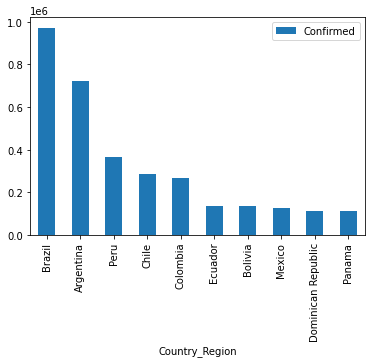

In [149]:
dfc = df.sort_values(['Confirmed'],ascending=False).groupby('Confirmed').head(10)
dfc = dfc.drop_duplicates(subset=['Country_Region'])
dfc.head(10).plot.bar(x='Country_Region', y='Confirmed')